# Classification

It is a supervised ML technique that helps in predicting categorical
or discrete outputs. Classification is typically used for the 
purpose of categorising/classification of instances or samples.


**some common classification algorithms:**
* logistic regression
* decision trees 
* kNN (k-Nearest Neighbours)
* SVM (Support Vector Machines)

### 1.Logistic Regression

It is the supervised ML algo. used for **binary** classification.

Logistic Regression computes the probability of a sample belonging to each of the classes.
 
* The probability of a non-linear sigmoid or logistic function is calculated via:-
        sigmoid(z) = 1 / 1+e^-z
  where, z = $B_{0}$ + $B_{1}$.$x_{1}$ + $B_{2}$.$x_{2}$...+$B_{n}$.$x_{n}$

In the above expression of z the $x_{1}$, $x_{2}$,..., $x_{n}$  = input features values or predictor values.
and $B_{1}$, $B_{2}$,...,$B_{n}$ = coeffiecients associated with the i/p featrues heping to decide how much influence a feature will have on the final sigmoid(z) value.
$B_{0}$ = intercept.
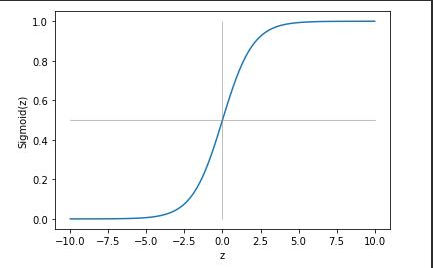
the graph of the above sigmoid function show that the output fo the function lies between 0 and 1. 

In [41]:
# Applying the logistic regression on the data of the coronary heart disease
import pandas as pd

# chd = pd.read_csv("//home//vishal-mathur//machine_learning_stuff-main//chd_data.csv")
chd = pd.read_csv("C:\\D\\infosys\\chd_data.csv")
chd.head() 
# chd = 0 denotes negative results for coronary heart disease
# chd = 1 denotes positive results for coronary heart disease

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


Text(0.5, 1.0, 'Age vs coronary heart disease')

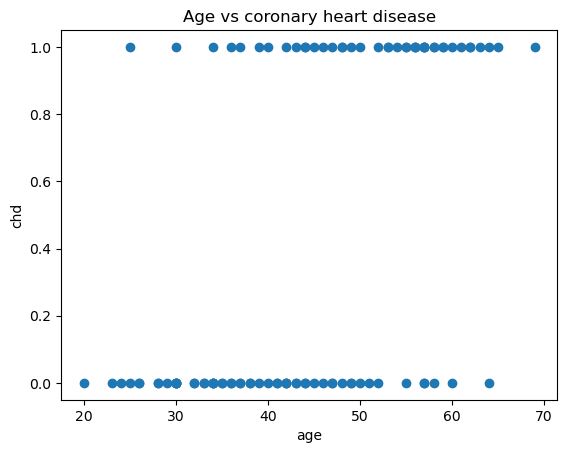

In [60]:
# Visualization of the data

from matplotlib import pyplot as plt
%matplotlib inline

# plt.scatter("age", "chd", data = chd)
plt.scatter(chd.age, chd.chd)
plt.xlabel("age")
plt.ylabel("chd")
plt.title("Age vs coronary heart disease")

In [43]:
# Building a Logistic Regression model for coronary heart disease

from sklearn.model_selection import train_test_split

predictors = ["age"]
target = "chd"

X = chd[predictors]
y = chd[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (70, 1)
Shape of X_test (30, 1)
Shape of y_train (70,)
Shape of y_test (30,)


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

print("Intercept: ", model.intercept_, "\n Coefficients: ", model.coef_)

Intercept:  [-5.65118929] 
 Coefficients:  [[0.11144281]]


In [45]:
# testing hte logistic model for the probability of occurrence 
# for coronary heart disesse for a person aged 29 
import numpy as np
test = np.array([29]).reshape(1, -1)

print("Printing the probability for the class '0' and '1' respectively: ", model.predict_proba(test))

print("\n Predicted target i.e. 'chd' value: ", model.predict(test))

Printing the probability for the class '0' and '1' respectively:  [[0.91829082 0.08170918]]

 Predicted target i.e. 'chd' value:  [0]


C:\Users\VISHAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\VISHAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
print("Accuracy score of the model on training data: ", model.score(X_train, y_train))
print("Accuracy sccore of the model on test data: ", model.score(X_test, y_test))

Accuracy score of the model on training data:  0.7428571428571429
Accuracy sccore of the model on test data:  0.7333333333333333


In [47]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

credit_data = pd.read_csv("C:\\D\\infosys\\credit_risk.csv")
credit_data.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [48]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [49]:
# understanding the values the 'class' (our target) can take 

credit_data['class'].unique()
#this show that the data is of two types that are either good or bad
# credit risk

array(['good', 'bad'], dtype=object)

In [50]:
# selecting all columns as the predictor variables except the 
# class column
X = credit_data.columns.drop("class")
# Selecting the 'class' as the target variable in y
y = credit_data['class']

In [51]:
y

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: object

In [52]:
# using get_dummies for one hot encoding
credit_data_encoded = pd.get_dummies(credit_data[X])

# checking the shape of the input data
credit_data_encoded.shape

credit_data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   credit_usage                                   1000 non-null   int64
 1   current_balance                                1000 non-null   int64
 2   location                                       1000 non-null   int64
 3   residence_since                                1000 non-null   int64
 4   cc_age                                         1000 non-null   int64
 5   existing_credits                               1000 non-null   int64
 6   num_dependents                                 1000 non-null   int64
 7   over_draft_0<=X<200                            1000 non-null   uint8
 8   over_draft_<0                                  1000 non-null   uint8
 9   over_draft_>=200                               1000 non-null   uint8
 10  o

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(credit_data_encoded, y, test_size = 0.15, random_state = 100)

In [54]:
print("Shape of X_trian: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_trian: ", y_train.shape)
print("Shape of y_test ", y_test.shape)

Shape of X_trian:  (850, 61)
Shape of X_test:  (150, 61)
Shape of y_trian:  (850,)
Shape of y_test  (150,)


In [55]:
# Building a model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\VISHAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
# evaluating the model's performance and accuracy on the trainin and test data:
train_accuracy = model.score(X_train, y_train)
print("Train accuracy: ", train_accuracy)

test_accuracy = model.score(X_test, y_test)
print("Test acccuracy: ", test_accuracy)

Train accuracy:  0.7752941176470588
Test acccuracy:  0.74


In [59]:
# Measuring Performance using Confusion Matrix

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

from sklearn.metrics import confusion_matrix

train_conf_matrix = confusion_matrix(y_train, train_predictions)

pd.DataFrame(train_conf_matrix, columns = model.classes_, index = model.classes_)

,bad,good
bad,125,132
good,59,534
